In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Transform the data into DataFrame
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

In [4]:
#Some analyze about de DATA
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [6]:
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [7]:
print(observations.describe())
print(observations.nunique())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
scientific_name    5541
park_name             4
observations        304
dtype: int64


In [8]:
print(species_info.describe())
print(species_info.value_counts())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  
category        scientific_name         common_names                                       conservation_status
Amphibian       Anaxyrus canorus        Yosemite Toad                                      Threatened             1
Mammal          Sylvilagus bachmani     Brush Rabbit                                       Species of Concern     1
                Myotis lucifugus        Little Brown Myotis                                Species of Concern     1
                Myotis septentrionalis  Northern Long-Eared Bat, North

In [9]:
#Checking for duplicates and deleting them
duplicates_obs = observations.duplicated()
duplicates_spe = species_info.duplicated()
print(duplicates_obs.value_counts())
print(duplicates_spe.value_counts())

False    23281
True        15
dtype: int64
False    5824
dtype: int64


In [10]:
observations = observations.drop_duplicates()

In [11]:
#Seeing the names of the different parks
print(observations.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [12]:
#Seeing the categorys of the animals
print(species_info.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [13]:
#Checking the data types of each column
print(observations.dtypes)
print(species_info.dtypes)

scientific_name    object
park_name          object
observations        int64
dtype: object
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [14]:
#Counting the species of each category
species_info.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [15]:
#Counting the amount of observation for the different conservation status
species_info.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [16]:
#Counting the amount of observation for the different Parks

observations.groupby("park_name").size()

park_name
Bryce National Park                    5823
Great Smoky Mountains National Park    5818
Yellowstone National Park              5819
Yosemite National Park                 5821
dtype: int64

In [17]:
#Couting the amount of observations
print(observations.observations.sum())

3312429


In [18]:
#From this we can see that we just have 1 column with missing data, conservation_status, with about 5633 values missing. This means taht 96.72% of the values are missing
species_info[species_info.isnull().any(axis=1)]

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [19]:
#Checking the percentage of missing data of each column
max_rows= species_info['category'].count()
print((1-species_info.count()/max_rows)*100)

category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64


In [20]:
print(species_info.conservation_status.isnull().value_counts())

True     5633
False     191
Name: conservation_status, dtype: int64


In [21]:
#Fillin in the missing data with 'No Intervation'
species_info.fillna('No Intervention', inplace=True)

In [22]:
print(species_info.groupby("conservation_status").size())

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


In [23]:
conservation_category = species_info[species_info.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
print(conservation_category)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


Text(0, 0.5, 'Number of Species')

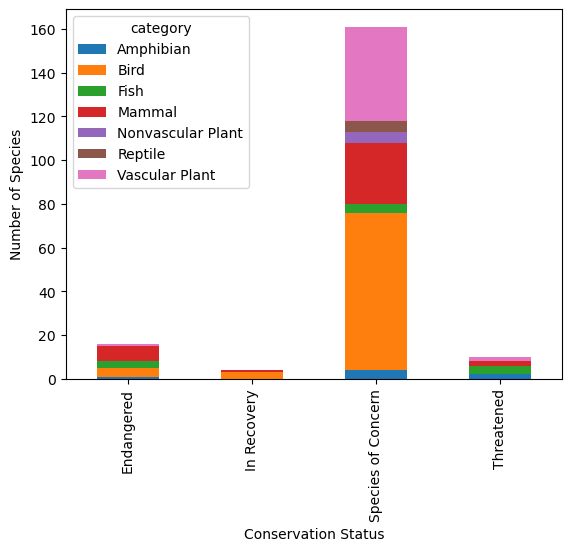

In [24]:
#Creating a plot with the number of species of each category for the conservation status
ax = conservation_category.plot(kind = 'bar', stacked = True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')

In [27]:
#Dividing each category in protected and not protected
species_info['is_protected'] = species_info.conservation_status != 'No Intervention'
category_counts = species_info.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns = 'is_protected', index = 'category', values = 'scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts['percent_protected'] = category_counts.protected/ (category_counts.protected + category_counts.not_protected) * 100
print(category_counts)

            category  not_protected  protected  percent_protected
0          Amphibian             72          7           8.860759
1               Bird            413         75          15.368852
2               Fish            115         11           8.730159
3             Mammal            146         30          17.045455
4  Nonvascular Plant            328          5           1.501502
5            Reptile             73          5           6.410256
6     Vascular Plant           4216         46           1.079305


                             park_name  species_count
0                  Bryce National Park         575901
1  Great Smoky Mountains National Park         431378
2            Yellowstone National Park        1442314
3               Yosemite National Park         862836


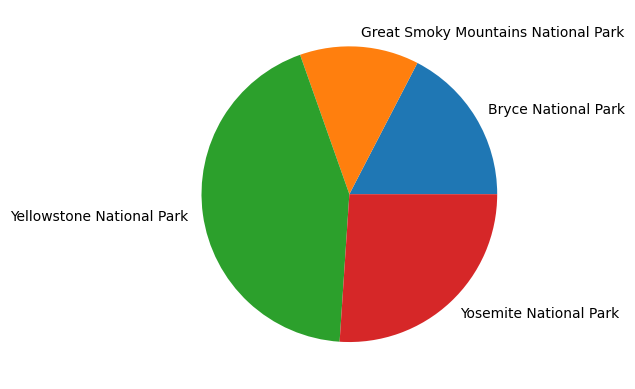

In [28]:
#Create a plot with the park name and the species_count
park_count = observations.groupby('park_name')['observations'].sum().reset_index()
park_count.columns = ['park_name', 'species_count']
print(park_count)
plt.pie(park_count.species_count, labels = park_count.park_name)
plt.show()